# Mutation-selection equilibrium in games with multiple strategies

## Initialization

In [1]:
# import modules
import numpy as np
import pandas as pd
import time
from sympy import *
from sympy.abc import i, j, k, N, n 
## compress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# save figures in the folder
_Figure_PATH_ = './figures/'
_Data_PATH_ = './data/'

# default colors of matplotlib
colors = ['C0', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', 
          '#17becf']

## Symbolic Calculation

In [3]:
N, n = symbols('N, n', integer = True, positive = True) # population size # phenotype/strategy size
delta = symbols('delta', positive = True) # selection strength
u, mu = symbols('u, mu', positive = True) # mutation probability # mutation rate
T, t, tau = symbols('T, t, tau', real = True) # time

A = MatrixSymbol('A', n, n) # payoff matrix
x = MatrixSymbol('x', n, 1) # frequency vector # x_k is the frequency of players using strategy k

init_printing(use_unicode = True) # for a good presentation of mathematics

In [4]:
# mu = N*u
# X = N*x
# f = OneMatrix(n, 1) + delta*(MatMul(A, x))

## Correlation

* ### two individuals $s_2$
    
___

* probability distribution function of coalescence time: $f_2(\tau_2)$

* probability of having the same strategy: $s_2^\ast(\tau_2)$

> #### $f_2(\tau) = e^{-\tau} \qquad s_2^\ast(\tau) = e^{-\mu\tau} + \frac{1 - e^{-\mu\tau}}{n}$

####
\begin{equation}
s_2 = \int_{0}^{+\infty}s_2^\ast(\tau)f_2(\tau)d\tau = \frac{n + \mu}{n(1 + \mu)}
\end{equation}

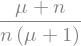

In [5]:
f_2 = exp(-tau)
s_2_ast = exp(-mu*tau) + (1 - exp(-mu*tau))/n
s_2 = factor(integrate(s_2_ast*f_2, (tau, 0, oo)))
s_2

* ### three individuals $s_3$

___

* probability distribution function of coalescence time: $f_3(\tau_3)$
* probability of having the same strategy
    >
    * three identical players: $s_3^\ast(\tau_3)$
    * two identical players and one different player: $s_3^{\ast\ast}(\tau_3)$
    
> #### $f_3(\tau) = 3e^{-3\tau}$
    
> #### $s_3^\ast(\tau) = \frac{1}{n^2}[1 + 3(n - 1)e^{-\mu\tau} + (n - 1)(n - 2)e^{-3\mu\tau/2}]$

> #### $s_3^{\ast\ast}(\tau) = \frac{1}{n^2}[1 + (n - 3)e^{-\mu\tau} - (n - 2)e^{-3\mu\tau/2}]$

####
\begin{equation}
s_3 = s_2 \times \int_{0}^{+\infty}s_3^\ast(\tau)f_3(\tau)d\tau + (1 - s_2) \times \int_{0}^{+\infty}s_3^{\ast\ast}(\tau)f_3(\tau)d\tau = \frac{(n + \mu)(2n + \mu)}{n^2(1 + \mu)(2 + \mu)}
\end{equation}

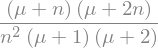

In [6]:
f_3 = 3*exp(-3*tau)
s_3_ast = 1/n**2*(1 + 3*(n - 1)*exp(-mu*tau) + (n - 1)*(n - 2)*exp(-3*mu*tau/2))
s_3_astast = 1/n**2*(1 + (n - 3)*exp(-mu*tau) - (n - 2)*exp(-3*mu*tau/2))
s_3 = factor(s_2*integrate(s_3_ast*f_3, (tau, 0, oo)) + (1 - s_2)*integrate(s_3_astast*f_3, (tau, 0, oo)))
s_3

## Average

* ### one individual: $\langle x_k \rangle = \langle x_1 \rangle$
* ### two individuals
    >
    * two identical: $\langle x_ix_i \rangle = \langle x_1x_1 \rangle$
    * two different: $\langle x_ix_j \rangle = \langle x_1x_2 \rangle$
* ### three individuals
    >
    * three identical: $\langle x_ix_ix_i \rangle = \langle x_1x_1x_1 \rangle$
    * two identical and one different: $\langle x_ix_jx_j \rangle = \langle x_1x_2x_2 \rangle$
    * three different: $\langle x_ix_jx_k \rangle = \langle x_1x_2x_3 \rangle$
    
> #### $\langle x_1 \rangle = \frac{1}{n}$

> #### $\langle x_1x_1 \rangle = \frac{s_2}{n} \qquad \langle x_1x_2 \rangle = \frac{1 - s_2}{n(n - 1)}$

> #### $\langle x_1x_1x_1 \rangle = \frac{s_3}{n} \qquad \langle x_1x_2x_2 \rangle = \frac{s_2 - s_3}{n(n - 1)} \qquad \langle x_1x_2x_3 \rangle = \frac{1 - 3s_2 + 2s_3}{n(n - 1)(n - 2)}$

In [7]:
x_1 = 1/n
x_1x_1, x_1x_2 = s_2/n, (1 - s_2)/(n*(n - 1))
x_1x_1x_1, x_1x_2x_2, x_1x_2x_3 = s_3/n, (s_2 - s_3)/(n*(n - 1)), (1 - 3*s_2 + 2*s_3)/(n*(n - 1)*(n - 2))

## Abundance

* average change of type $k$

* abundance of type $k$

In [8]:
X = hadamard_product(FunctionMatrix(n, 1, Lambda((i, j), N)), x) # number vector # X_k is the number of players using strategy k
f = OneMatrix(n, 1) + hadamard_product(FunctionMatrix(n, 1, Lambda((i, j), delta)), MatMul(A, x)) # payoff (fitness) vector
F = MatMul(X.transpose(), f)

In [9]:
w = OneMatrix(n, 1) - OneMatrix(n, 1)/N + f/F # average number of offspring vector
x_sel = hadamard_product(x, w) - x # equation (1.11) before Taylor expansion

In [10]:
sum_row = Sum(A[k, i]*OneMatrix(n, 1)[i, 0], (i, 0, n-1))
sum_column = Sum(A[i, k]*OneMatrix(n, 1)[i, 0], (i, 0, n-1))
sum_diagonal = Sum(A[i, i]*OneMatrix(n, 1)[i, 0], (i, 0, n-1))
sum_matrix = Sum(A[i, j], (i, 0, n-1), (j, 0, n - 1))
x_k_diff = 1/N*delta*(x_1x_1*A[k, k] 
                      + x_1x_2*(sum_row - A[k, k])
                      - x_1x_1x_1*A[k, k] 
                      - x_1x_2x_2*(sum_row + sum_column + sum_diagonal - 3*A[k, k]) 
                      - x_1x_2x_3*(sum_matrix - sum_row - sum_column - sum_diagonal + 2*A[k, k]))
x_k_diff = factor(x_k_diff)
x_k = 1/n + N*(1 - u)/u*x_k_diff

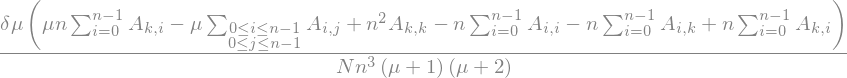

In [11]:
x_k_diff

In [12]:
L_k = 1/n*Sum((A[k, k] + A[k, i] - A[i, k] - A[i, i])*OneMatrix(n, 1)[i, 0], (i, 0, n - 1))
H_k = 1/n**2*Sum((A[k, j] - A[i, j]), (i, 0, n-1), (j, 0, n - 1))

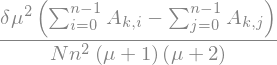

In [13]:
flag = x_k_diff - delta*mu*(L_k + mu*H_k)/(n*N*(1 + mu)*(2 + mu))
flag = factor(cancel(simplify(flag)))
flag

In [14]:
flag.subs(Sum(A[k, j], (j, 0, n - 1)), Sum(A[k, i], (i, 0, n - 1)))